# Clustering

## 0. Imports

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
data = pd.read_csv('data/regression.csv')

In [3]:
data = data.drop(columns=['pageviews'])
data

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
kmeans = KMeans(n_clusters=3, random_state=21)
data['kmeans_cluster'] = kmeans.fit_predict(data[['num_commits', 'AVG(diff)']])
data

,uid,num_commits,AVG(diff),kmeans_cluster
0,user_1,62,-64.400000,0
1,user_10,20,-74.800000,0
2,user_14,61,-159.000000,1
3,user_17,51,-61.600000,0
4,user_18,5,-5.666667,0
5,user_19,118,-98.750000,2
6,user_21,65,-95.500000,2
7,user_25,79,-92.600000,2
8,user_28,60,-86.400000,2
9,user_3,18,-105.400000,1


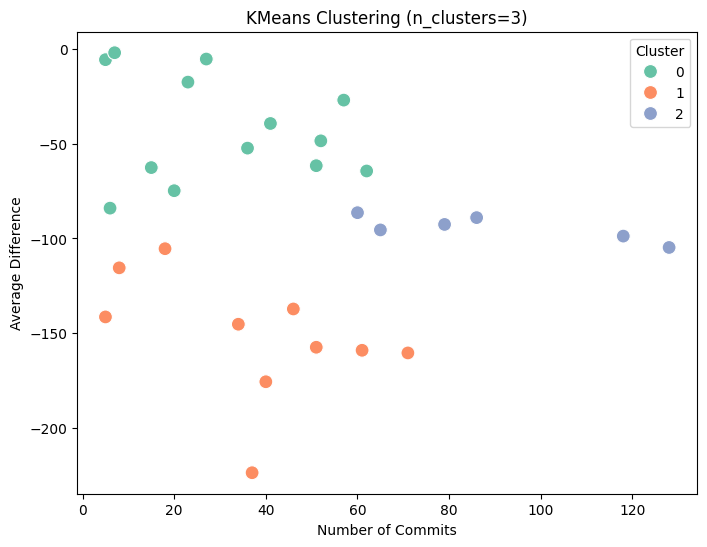

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['num_commits'], 
    y=data['AVG(diff)'], 
    hue=data['kmeans_cluster'], 
    palette='Set2', 
    s=100
)
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.legend(title='Cluster')
plt.show()

In [6]:
score = silhouette_score(data[['num_commits', 'AVG(diff)']], data['kmeans_cluster'])
print(f'Silhouette Score (n_clusters=3): {score}')

Silhouette Score (n_clusters=3): 0.4454402135233297


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [7]:
dbscan = DBSCAN(eps=20, min_samples=2)
data['dbscan_cluster'] = dbscan.fit_predict(data[['num_commits', 'AVG(diff)']])
data

,uid,num_commits,AVG(diff),kmeans_cluster,dbscan_cluster
0,user_1,62,-64.400000,0,0
1,user_10,20,-74.800000,0,1
2,user_14,61,-159.000000,1,2
3,user_17,51,-61.600000,0,0
4,user_18,5,-5.666667,0,3
5,user_19,118,-98.750000,2,4
6,user_21,65,-95.500000,2,5
7,user_25,79,-92.600000,2,5
8,user_28,60,-86.400000,2,5
9,user_3,18,-105.400000,1,6


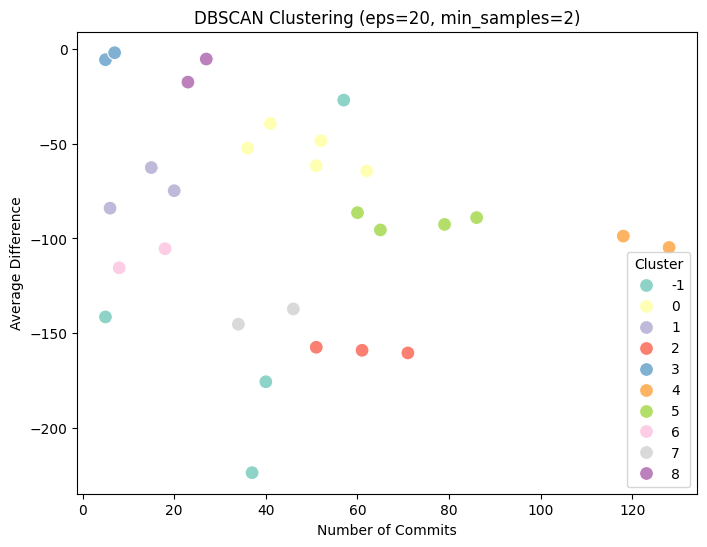

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['num_commits'], 
    y=data['AVG(diff)'], 
    hue=data['dbscan_cluster'], 
    palette='Set3', 
    s=100
)
plt.title('DBSCAN Clustering (eps=20, min_samples=2)')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.legend(title='Cluster')
plt.show()

In [9]:
filtered_data = data[data['dbscan_cluster'] != -1]
if not filtered_data.empty:
    score = silhouette_score(
        filtered_data[['num_commits', 'AVG(diff)']], 
        filtered_data['dbscan_cluster']
    )
    print(f'Silhouette Score (DBSCAN): {score}')
else:
    print('Silhouette Score не может быть рассчитан, так как все точки - шум.')

Silhouette Score (DBSCAN): 0.5441859666389783


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [10]:
agglo = AgglomerativeClustering(n_clusters=5)
data['agglo_cluster'] = agglo.fit_predict(data[['num_commits', 'AVG(diff)']])
data

,uid,num_commits,AVG(diff),kmeans_cluster,dbscan_cluster,agglo_cluster
0,user_1,62,-64.400000,0,0,2
1,user_10,20,-74.800000,0,1,3
2,user_14,61,-159.000000,1,2,0
3,user_17,51,-61.600000,0,0,2
4,user_18,5,-5.666667,0,3,4
5,user_19,118,-98.750000,2,4,1
6,user_21,65,-95.500000,2,5,1
7,user_25,79,-92.600000,2,5,1
8,user_28,60,-86.400000,2,5,1
9,user_3,18,-105.400000,1,6,3


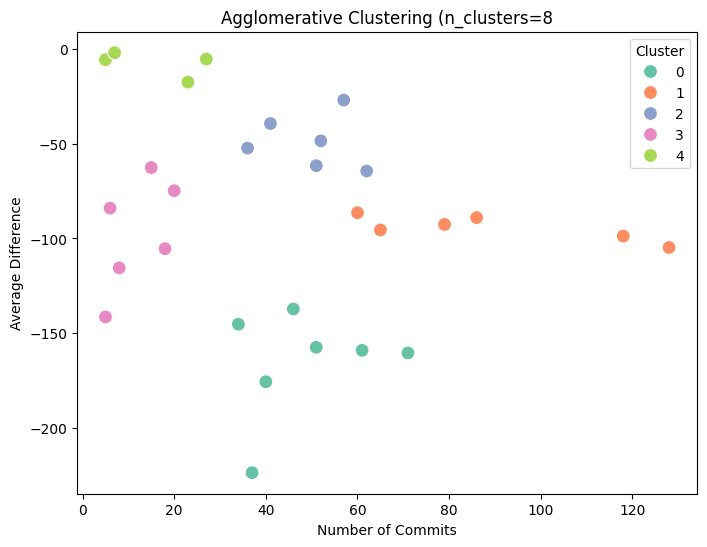

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['num_commits'], 
    y=data['AVG(diff)'], 
    hue=data['agglo_cluster'], 
    palette='Set2', 
    s=100
)
plt.title('Agglomerative Clustering (n_clusters=8')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.legend(title='Cluster')
plt.show()

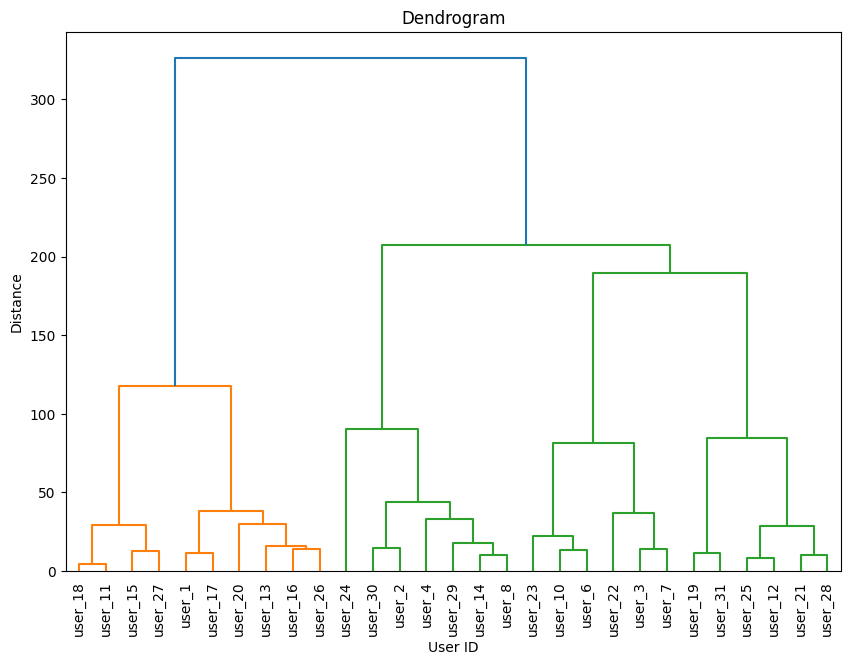

In [12]:
linked = linkage(data[['num_commits', 'AVG(diff)']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=data['uid'].values, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('User ID')
plt.ylabel('Distance')
plt.show()

In [13]:
score = silhouette_score(data[['num_commits', 'AVG(diff)']], data['agglo_cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.46383015199381467
